In [1]:
import numpy as np 
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
data = pd.read_csv("LagosRentCleaned.csv", sep=",")
data.head()

,Location,Type,Rooms,Price
0,Lekki,semi-detached duplex,6,5000000
1,Lekki,terraced duplex,3,2500000
2,Gbagada,terraced duplex,4,4000000
3,Lekki,detached duplex,4,4600000
4,Lekki,detached duplex,4,3000000


In [4]:
X = np.array(data[['Location', 'Type', 'Rooms']])
y = np.array(data['Price'])

In [5]:
X

array([['Lekki', 'semi-detached duplex', 6],
       ['Lekki', 'terraced duplex', 3],
       ['Gbagada', 'terraced duplex', 4],
       ...,
       ['VI', 'semi-detached duplex', 4],
       ['Lekki', 'terraced duplex', 4],
       ['Lekki', 'semi-detached duplex', 4]], dtype=object)

In [6]:
y

array([5000000, 2500000, 4000000, ..., 4500000, 3000000, 4000000],
      dtype=int64)

In [7]:
enc = LabelEncoder()
X[:, 1] = enc.fit_transform(X[:, 1])

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 585)

In [10]:
reg = DecisionTreeRegressor(random_state=585)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=585, splitter='best')

In [12]:
acc = reg.score(X_train, y_train)
pred = reg.predict(X_test)

In [14]:
print(acc)

0.6089126492901717


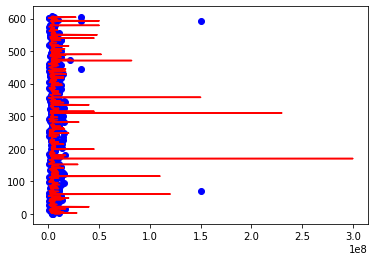

In [17]:
import  matplotlib.pyplot as plt
plt.scatter( pred, np.arange(len(pred)), color='blue')
plt.plot(y_test, np.arange(len(pred)), color='red')
plt.show()

In [18]:
for i in range(len(pred)):
    if i <= round(0.5 * (len(pred))):
        print( y_test[i], pred[i])

6500000 4027142.8571428573
12000000 4473333.333333333
3000000 4027142.8571428573
28000000 10719354.838709677
4000000 3979569.8924731184
15000000 5781985.294117647
1800000 3181818.1818181816
2500000 2617977.5280898875
12000000 5781985.294117647
3000000 4027142.8571428573
3000000 4027142.8571428573
1000000 866666.6666666666
8000000 10719354.838709677
5000000 3979569.8924731184
3000000 3500000.0
1600000 7133333.333333333
17000000 16062500.0
3000000 4027142.8571428573
6000000 5781985.294117647
5000000 5781985.294117647
13000000 9150000.0
4500000 3979569.8924731184
40000000 4027142.8571428573
2000000 6150000.0
4000000 5375824.175824176
5000000 5781985.294117647
6500000 5781985.294117647
2500000 3377777.777777778
650000 950000.0
8500000 8937500.0
4000000 5781985.294117647
6000000 6463636.363636363
2800000 5375824.175824176
1800000 6150000.0
2300000 5781985.294117647
4500000 4027142.8571428573
3000000 3377777.777777778
6500000 4750000.0
6000000 10719354.838709677
600000 416666.6666666667
3000